<h2 align="center">TIME SERIES FORECASTING CON REDES EXPERIMENTALES FAN (Fourier Analysis Networks)</h2>

<h4 align="center">Autor: José David Jiménez Vicente</h4>

____  
____

#### MOTIVACIÓN:
  
  Este es un proyecto experimental para incorporar un nuevo tipo de redes neuronales a un proyecto de forecasting de series temporales, las redes FAN, que están basadas en un nuevo algoritmo basado en las Series de Fourier para predecir la función que queremos descubrir en base a los datos, en vez de usar combinaciones lineales, por muy complejas que sean como algoritmo. Puedes ver el paper completo de los creadores [aquí](https://arxiv.org/html/2410.02675v3). Mi objetivo no es hacer un estudio matemático del proyecto, para eso ya está el propio proyecto original, sino traducir las matemáticas a un lenguaje lo más natural posible para revelar su intuición y cómo aplicarlo en nuestros proyectos como Data Scientists. Que me perdonen los matemáticos y los creadores del proyecto original por no ser matemáticamente exacto, pero lo que han creado es tan bello que hay que intentar explicarlo de manera que llegue al mayor público posible.    
  _____
#### ANÁLISIS:  
  Podemos resumir el motivo de existencia de estas redes de la siguiente manera:
  
- Los algoritmos habituales usados para redes como LSTM, ARIMA o muchos de los Transformers no dejan de ser más que combinaciones lineales especializadas con una activación no lineal, sobrecargadas de variables y sus pesos, que se hacen crecer en complejidad de capas, y con uso de datos masivos para poder llegar a aproximar de forma indirecta la función que queremos predecir, como "tanteando a ciegas" para encontrar la solución. El "tanteo" lo hacen intentando reducir el error cometido (RMSE, MSE, ....). Si reducen dicho error, es que lo están haciendo bien, hasta que ya no pueden más.
- La ventaja de las FAN según sus creadores es que le aportan a la red la capacidad de detectar patrones temporales oscilatorios dentro del propio proceso de aprendizaje del algoritmo, al incorporar funciones de seno y coseno dentro de la fórmula donde antes sólo había una combinación lineal. Es decir, en vez de "tantear a ciegas" la solución en base a si reducen el error, las FAN le dan una capacidad natural comparable a "sentir" la función oscilatoria mientras aprenden para poder acercarse a ella. Sus caraterísticas y ventajas se ponen enseguida de manifiesto:

  - Son muchísimo más exactas donde no hay, y donde si hay, datos previos: fuera del periodo temporal que se ha usado para el entrenamiento. Por lo tanto, generalizan mejor.
  - Les lleva mucho menos tiempo converger.
  - Necesitan menos pesos, con lo que acaban construyendo modelos más ligeros.
  - Al "sentir" de manera natural los patrones, pueden detectar estacionalidad o patrones ocultos donde pensamos que no los puede haber. Por lo tanto, son buenas para poder detectar conmo filtro previo si un dataset puede contener patrones repetitivos donde ni lo habíamos planteado en principio.
  - Fruto de lo anterior, seguramente sean muy buenas para implementar LLMs, ya que el lenguaje no es más que patrones de comunicación con reglas repetitivas establecidas. Si no fuera así, no podríamos interpretar ninguna comunicación. Incluso, las comunicaciones con cifrados clásicos basados en transmutación del lenguaje, como el César.
  - Incorporan una parte lineal dentro del algoritmo, por lo que para problemas no oscilatorios son tan buenas como, o más que, un algoritmo lineal habitual, por lo que se pueden usar para cualquier tarea.
  - Las capas de FAN se pueden implementar fácilmente con librerías como pyTorch, integrándolas dentro de otros modelos, como por ejemplo un Transformer, para potenciar su resultado.
____

#### PRIMER VISTAZO:

Aquí podéis una gráfica sacada del paper en ArXiv para que entendáis visualmente a lo que me refiero:  

![Comparativa](https://arxiv.org/html/2410.02675v3/x1.png)

(Imagen creada por los autores del paper)

__*Explicación de la gráfica:*__  
  - Se comparan en el paper original una red tradicional multicapa Multi-Layer Perceptron (MLP), una red Kolmogorov-Arnold (KAN), una red Transformer como las que alimentan a los LLM, y una FAN.
  - Aunque no se aprecie al mezclarse con el color rojo de los modelos dando el marrón, las líneas verdes simbolizan el periodo de datos suministrado para el entrenamiento, y van del -20 al +20 en el eje X. Las azules son aquellas de datos desconocidos para el modelo, suministrados para el test tras el entrenamiento.
  - Podemos ver que las lineas rojas son las predicciones de los modelos. En todos, la línea se vuelve marrón donde los modelos coinciden en la predicción con los datos que conocen en color verde. En los modelos no FAN, coinciden correctamente en las predicciones sobre los datos de entrenamiento, pero más allá son incapaces de capturar la función de los ciclos no lineales, al estar basados en relaciones lineales. Sin embargo, el resultado de la FAN es abrumador: ha capturado el patrón y puede repetir la predicción sobre los datos que no conoce perfectamente. Podríamos pensar: "ja, es que sólo es un seno"; sin embargo los otros modelos no han podido capturar un ciclo tan estable y predecible como el del seno.  


¿Y si le damos a tragar algo no tan fácil como un seno?:  

![Función compleja](https://arxiv.org/html/2410.02675v3/x4.png)

(Imagen creada por los autores del paper)

Símplemente, deja con la boca abierta. Esta es una función compleja, con múltiples ciclos dentro de ciclos. Los algoritmos lineales en este caso no son capaces ni de predecir correctamente todos los datos que se han usado para entrenar al modelo. El que más acierta es el Transformer, de ahí sus grandes resultados en las aplicaciones como LLMs y generativa, pero la red FAN predice el ciclo completo, al ser repetitivo.
____

#### VALE, PERO ¿CÓMO SE COMPORTAN REALMENTE?:

En el estudio original comparan el rendimiento de los distintos modelos mediante la función de pérdida, aproximando 4 funciones distintas y mostrando el loss en training y en testing:

![Comparativa](https://arxiv.org/html/2410.02675v3/x5.png)

(Imagen creada por los autores del paper)

Increíble, ¿no?. Casi no hay que añadir palabras. Los errores del FAN son casi tan próximos a 0 en algunas gráficas que se confunden con el eje X. Las KAN son lás únicas que se les pueden aproximar en cuanto a estabilidad, aunque quedan igualmente lejos en cuanto a resultado.
____

#### CHUPITO MATEMÁTICO:

No quiero entrar en las matemáticas subyacentes, como decía, pero no queda más remedio que dar un pequeño brochazo de color matemático:  

![Diferencia básica entre modelos](https://arxiv.org/html/2410.02675v3/x2.png)

(Imagen creada por los autores del paper)

Si observamos con atención, en las redes habituales como la MLP (a la izquierda), la salida de cada neurona sólo es una relación lineal modificada por una función de activación no-lineal "σ", como se ve en la fómula superior. Pero a la derecha vemos el motor de las FAN: Una parte de las neuronas ajusta un coseno, otra parte un seno, y el resto una lineal con activación, encadenándolas en una única salida final. Por eso es tan potente.  

____

#### MANOS A LA OBRA:

¿Cómo se comportarán con datos reales, que aunque pueden tener patrones estacionales, dichos ciclos son más imprevisibles (que una función descriptible con una fórmula exacta) al poder verse afectados externamente por otras variables de comportamiento no exacto, como el clima?  
  
¿Cómo de flexibles son las redes? ¿Podemos implementarlas de diferentes maneras?  
  
Voy a testear las redes FAN aplicándolas a la predicción de consumo energético de un hogar, en base a los datos recogidos a lo largo de 4 años. Es un dataset perfecto para poner a prueba las redes FAN. El [dataset que usaré](https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption) es del magnífico repositorio para ML de la UC Irvine. Aconsejo encarecidamente darse una vualta por la descripción del datset y por el site en general.  

Antes de detallar más sobre los modelos, describiré cómo se estructura a nivel básico la red FAN:  
- *Capas:*
  - Tiene una capa FAN para la capa de entrada.
  - A continuación se concatenan las capas FAN que se quiera.
  - Por último, una capa lineal para el valor único de salida.
- *Neuronas:*
  - Su definición es un tanto peculiar. Hemos dicho hace un momento en la anterior gráfica que una parte de las neuronas calcula el seno, otra el coseno y el resto la lineal. Sin embargo...
  - ...el número de neuronas es en verdad dinámico. Aunque establezcamos un número de neuronas en el parámetro `hidden_size`, lo que define su tamaño final es **la proporción sobre el número introducido** de neuronas que queremos que tenga cada tipo de componente a encontrar (componentes periódicos y componentes no periódicos), usando los parámetros `d_p` para los periódicos y `d_p_bar` para los lineales.
  - Ejemplo: Supongamos que le especificamos que cada capa debe tener 60 neuronas (`hidden_size=60`). Podríamos querer que para el componente del seno use 1/4 (25%) de ellas, para el coseno otro 25% (`d_p=1/4`, ambas usan el mismo parámetro), y para el lineal un 50% (`d_p_bar=1/2`). De momento todo bien, tendríamos un total de 15 + 15 + 30 = 60 neuronas. Peeeeroooo.... podríamos decirle que queremos para el seno y coseno un tercio de ellas (`d_p=1/3`), y para el lineal el 50% (`d_p_bar=1/2`). 1/3 de 60 = 20, así que el número total de neuronas daría 20 + 20 + 30 = 70, y esto no coincide con los 60 especificados. Así, el valor real final de `hidden_size` será el 70.
  - En realidad, el número de neuronas especificado en `hidden_size` actúa como una escala relativa inicial más que como un número absoluto, y los parámetros `d_p` y `d_p_bar` especifican cómo de importante debe de ser cada uno de los tipos de componentes respecto al otro tipo. En el segundo caso, donde la suma da 70, le damos más importancia que antes (con `d_p=1/3` ahora frente a 1/4 antes) a los componentes periódicos respecto al lineal, permitiéndole capturar ciclos más complejos.  
  
Dicho esto, se van a comparar 6 modelos con 3 tecnologías diferentes:
- Una red LSTM
- Redes FAN, con 4 variantes:
  - Una sencilla, con 1 capa FAN de entrada, 3 FAN ocultas y una lineal de salida, respetando el número de neuronas de `hidden_size`.
  - Una más afinada, con las mismas capas, pero añadiendo dropout y regularización en cada una, aumentando el porcentaje de neuronas para los periódicos, y con ello el tamaño final del `hidden_size`.
  - Una con puerta lógica, la "Gated", que añade una función al algoritmo para aportar pesos dinámicamente a los componentes cíclicos o a los lineales, según sea la influencia real de ambos en cada momento.
  - Un modelo con mecanismo de atención con tres capas propias, añadido antes de la capa lineal de salida, como los transformers.
- Un modelo ARIMA, relativamente complejo para capturar menos erróneamente los ciclos.

  

In [1]:
# Implementación de redes FAN (Fourier Analysis Networks)
# Basado en el paper: Dong et al. (2024) - FAN: Fourier Analysis Networks
# arXiv:2410.02675

In [2]:
# Imports y configuración de dispositivo MPS/CPU
# ================================================
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX
import ipywidgets as widgets
from IPython.display import display, clear_output
import time
import random

warnings.filterwarnings('ignore')

# Importar el dataset desde UCI ML Repository
from ucimlrepo import fetch_ucirepo

In [3]:
# Establecer semilla global para reproducibilidad
# ==================================================
SEED = 42  # Usar la "respuesta a la vida, el universo y todo lo demás" como semilla

# Establecer semillas para todas las fuentes de aleatoriedad
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)  # Si usas CUDA
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# También fijar la semilla para el generador por defecto de PyTorch
generator = torch.Generator().manual_seed(SEED)

In [4]:
# Detectar y usar MPS en macOS si está disponible
if torch.backends.mps.is_available():
    DEVICE = torch.device("mps")
    print("Usando dispositivo MPS (Apple Silicon)")
elif torch.cuda.is_available():
    DEVICE = torch.device("cuda")
    print("Usando dispositivo CUDA (NVIDIA GPU)")
else:
    DEVICE = torch.device("cpu")
    print("Usando dispositivo CPU")

#DEVICE = torch.device("cpu")

Usando dispositivo MPS (Apple Silicon)


In [5]:
# Configurar PyTorch para evitar problemas de importación circular
torch._C._jit_set_profiling_executor(False)
torch._C._jit_set_profiling_mode(False)


True

In [6]:
# Uso de parámetros iniciales mejorados
def init_weights(m):
    # Establecer semilla para inicialización determinista
    torch.manual_seed(SEED)
    
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight, gain=torch.nn.init.calculate_gain('relu'))
        nn.init.zeros_(m.bias)
    elif hasattr(m, 'Wp'):
        nn.init.xavier_uniform_(m.Wp, gain=1.0)
        if hasattr(m, 'Wp_bar'):
            nn.init.xavier_uniform_(m.Wp_bar, gain=1.0)
            nn.init.zeros_(m.Bp_bar)

In [7]:
# Función para comprobar estacionariedad
def check_stationarity(series):
    result = adfuller(series)
    print('Test ADF:')
    print(f'Estadístico: {result[0]}')
    print(f'p-valor: {result[1]}')
    print(f'Valores críticos: {result[4]}')
    
    if result[1] <= 0.05:
        print("La serie es estacionaria")
    else:
        print("La serie no es estacionaria")
    return result[1] <= 0.05

In [8]:
# Función para análisis detallado de resultados (solo RMSE y R²)
def analyze_results(models, test_predictions, test_dates, test_target, arima_forecast=None):
    """
    Realiza un análisis detallado de los resultados de los modelos.
    
    Args:
        models: Diccionario con los modelos entrenados
        test_predictions: Diccionario con predicciones (pred, actual) para cada modelo
        test_dates: Fechas del conjunto de test
        test_target: Valores reales del target en test
        arima_forecast: Predicciones del modelo SARIMA (opcional)
    """
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import mean_squared_error, r2_score
    
    # 1. Métricas detalladas para cada modelo
    print("\n=== ANÁLISIS DETALLADO DE RESULTADOS ===\n")
    
    # Crear DataFrame para comparación de métricas
    metrics = []
    
    # Agregar modelos de redes neuronales
    for name, (preds, actuals) in test_predictions.items():
        rmse = np.sqrt(mean_squared_error(actuals, preds))
        r2 = r2_score(actuals, preds)
        
        metrics.append({
            'Modelo': name,
            'RMSE': rmse,
            'R²': r2
        })
    
    # Agregar SARIMA si está disponible
    if arima_forecast is not None:
        rmse = np.sqrt(mean_squared_error(test_target, arima_forecast))
        r2 = r2_score(test_target, arima_forecast)
        
        metrics.append({
            'Modelo': 'SARIMA',
            'RMSE': rmse,
            'R²': r2
        })
    
    # Convertir a DataFrame y mostrar
    metrics_df = pd.DataFrame(metrics).set_index('Modelo')
    print("Métricas de evaluación:")
    print(metrics_df)
    
    # 2. Visualización de métricas
    plt.figure(figsize=(14, 6))
    
    # RMSE
    plt.subplot(1, 2, 1)
    sns.barplot(x=metrics_df.index, y=metrics_df['RMSE'])
    plt.title('RMSE por Modelo', fontsize=14)
    plt.ylabel('RMSE', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    # R²
    plt.subplot(1, 2, 2)
    sns.barplot(x=metrics_df.index, y=metrics_df['R²'])
    plt.title('R² por Modelo', fontsize=14)
    plt.ylabel('R²', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(os.path.join(images_dir, 'metricas_comparativas.png'), dpi=300, bbox_inches='tight')
    plt.show()
    
    # 3. Análisis de errores por franja horaria
    error_analysis = []
    
    for name, (preds, actuals) in test_predictions.items():
        # Calcular errores
        errors = np.abs(preds - actuals)
        
        # Agregar a DataFrame junto con horas
        hours = [date.hour for date in test_dates]
        
        for hour, error in zip(hours, errors):
            error_analysis.append({
                'Modelo': name,
                'Hora': hour,
                'Error': error
            })
    
    # Agregar SARIMA si está disponible
    if arima_forecast is not None:
        errors = np.abs(arima_forecast - test_target)
        
        for hour, error in zip(hours, errors):
            error_analysis.append({
                'Modelo': 'SARIMA',
                'Hora': hour,
                'Error': error
            })
    
    # Convertir a DataFrame
    error_df = pd.DataFrame(error_analysis)
    
    # Agrupar por modelo y hora
    hourly_errors = error_df.groupby(['Modelo', 'Hora'])['Error'].mean().reset_index()
    
    # Visualizar errores por hora
    plt.figure(figsize=(15, 8))
    sns.lineplot(data=hourly_errors, x='Hora', y='Error', hue='Modelo', marker='o')
    plt.title('Error Promedio por Hora del Día', fontsize=16)
    plt.xlabel('Hora', fontsize=14)
    plt.ylabel('Error Absoluto Medio', fontsize=14)
    plt.xticks(range(0, 24))
    plt.grid(True, alpha=0.3)
    plt.legend(title='Modelo')
    plt.tight_layout()
    plt.savefig(os.path.join(images_dir, 'errores_por_hora.png'), dpi=300, bbox_inches='tight')
    plt.show()
    
    # 4. Análisis de predicciones extremas (picos altos y bajos)
    print("\nAnálisis de predicciones en valores extremos:")
    
    # Identificar valores extremos (percentiles 5 y 95)
    low_threshold = np.percentile(test_target, 5)
    high_threshold = np.percentile(test_target, 95)
    
    low_indices = np.where(test_target <= low_threshold)[0]
    high_indices = np.where(test_target >= high_threshold)[0]
    
    # Calcular RMSE en valores extremos para cada modelo
    extremes_analysis = []
    
    for name, (preds, actuals) in test_predictions.items():
        # RMSE en valores bajos
        low_rmse = np.sqrt(mean_squared_error(actuals[low_indices], preds[low_indices]))
        
        # RMSE en valores altos
        high_rmse = np.sqrt(mean_squared_error(actuals[high_indices], preds[high_indices]))
        
        extremes_analysis.append({
            'Modelo': name,
            'RMSE_Valores_Bajos': low_rmse,
            'RMSE_Valores_Altos': high_rmse
        })
    
    # Agregar SARIMA si está disponible
    if arima_forecast is not None:
        # RMSE en valores bajos
        low_rmse = np.sqrt(mean_squared_error(test_target[low_indices], arima_forecast[low_indices]))
        
        # RMSE en valores altos
        high_rmse = np.sqrt(mean_squared_error(test_target[high_indices], arima_forecast[high_indices]))
        
        extremes_analysis.append({
            'Modelo': 'SARIMA',
            'RMSE_Valores_Bajos': low_rmse,
            'RMSE_Valores_Altos': high_rmse
        })
    
    # Convertir a DataFrame y mostrar
    extremes_df = pd.DataFrame(extremes_analysis).set_index('Modelo')
    print(extremes_df)
    
    # Visualizar errores en valores extremos
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    sns.barplot(x=extremes_df.index, y=extremes_df['RMSE_Valores_Bajos'])
    plt.title('RMSE en Valores Bajos', fontsize=14)
    plt.ylabel('RMSE', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    sns.barplot(x=extremes_df.index, y=extremes_df['RMSE_Valores_Altos'])
    plt.title('RMSE en Valores Altos', fontsize=14)
    plt.ylabel('RMSE', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(os.path.join(images_dir, 'errores_valores_extremos.png'), dpi=300, bbox_inches='tight')
    plt.show()
    
    return metrics_df, error_df, extremes_df




In [9]:
# Crear directorio de imágenes si no existe
import os
images_dir = 'images'
if not os.path.exists(images_dir):
    os.makedirs(images_dir)
    print(f"Directorio '{images_dir}' creado para guardar figuras")
else:
    print(f"Usando directorio existente '{images_dir}' para guardar figuras")

Usando directorio existente 'images' para guardar figuras


In [10]:
# Función para crear gráficos interactivos
def plot_interactive_predictions(test_dates, test_target, test_predictions, sarima_forecast=None, period="week", widget_id=None):
    """
    Crea gráficos interactivos con checkboxes para seleccionar modelos.
    También guarda automáticamente la versión inicial con todos los modelos.
    
    Args:
        test_dates: Fechas del conjunto de test
        test_target: Valores reales del target en test
        test_predictions: Diccionario con predicciones (pred, actual) para cada modelo
        sarima_forecast: Predicciones del modelo SARIMA (opcional)
        period: "week" para 1 semana, "detail" para 3 días
        widget_id: Identificador único para los widgets (para evitar conflictos)
    """
    # Determinar los puntos a mostrar
    if period == "week":
        display_points = 168  # 1 semana
        start_idx = 0
        title = 'Predicción de Consumo Eléctrico (1 semana)'
        filename = 'predicciones_semana.png'
    else:  # "detail"
        start_idx = 24  # Comenzar después del primer día
        display_points = 72  # 3 días
        title = 'Detalle de la Predicción (3 días)'
        filename = 'predicciones_detalle.png'
    
    # Primero, crear y guardar una figura estática con todos los modelos
    plt.figure(figsize=(15, 8))
    
    # Mostrar datos reales
    plt.plot(
        test_dates[start_idx:start_idx+display_points], 
        test_target[start_idx:start_idx+display_points], 
        'k-', label='Datos reales', alpha=0.7
    )
    
    # Mostrar todos los modelos
    for name, (preds, _) in test_predictions.items():
        plt.plot(
            test_dates[start_idx:start_idx+display_points], 
            preds[start_idx:start_idx+display_points], 
            '--', label=f'{name} predicción', alpha=0.7
        )
    
    # Agregar SARIMA si está disponible
    if sarima_forecast is not None:
        plt.plot(
            test_dates[start_idx:start_idx+display_points], 
            sarima_forecast[start_idx:start_idx+display_points], 
            '-.', label='SARIMA predicción', alpha=0.7
        )
    
    plt.title(title, fontsize=16)
    plt.xlabel('Fecha', fontsize=14)
    plt.ylabel('Consumo Global (kW)', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)
    plt.tight_layout()
    
    # Guardar la figura con todos los modelos en la carpeta images
    plt.savefig(os.path.join(images_dir, filename), dpi=300, bbox_inches='tight')
    print(f"Figura guardada como '{os.path.join(images_dir, filename)}'")
    plt.close()  # Cerrar la figura estática para no confundir con la interactiva
    
    # Crear lista de modelos disponibles para la versión interactiva
    models_list = list(test_predictions.keys())
    if sarima_forecast is not None:
        models_list.append('SARIMA')
    
    # Cada instancia necesita sus propios widgets con IDs únicos
    widget_id = widget_id or period
    widget_prefix = f"widget_{widget_id}_"
    
    # Crear widgets para seleccionar modelos con IDs únicos
    checkboxes = {model: widgets.Checkbox(
                     value=True, 
                     description=model,
                     layout=widgets.Layout(width='150px')
                 ) for model in models_list}
    
    # Crear un contenedor para la figura
    fig_output = widgets.Output()
    
    # Función para actualizar el gráfico basado en selecciones
    def update_plot(b):
        # Limpiar la salida anterior
        fig_output.clear_output(wait=True)
        
        # Mostrar nueva figura
        with fig_output:
            plt.figure(figsize=(15, 8))
            
            # Siempre mostrar datos reales
            plt.plot(
                test_dates[start_idx:start_idx+display_points], 
                test_target[start_idx:start_idx+display_points], 
                'k-', label='Datos reales', alpha=0.7
            )
            
            # Mostrar modelos seleccionados
            for model, checkbox in checkboxes.items():
                if checkbox.value:  # Solo si está seleccionado
                    if model == 'SARIMA' and sarima_forecast is not None:
                        plt.plot(
                            test_dates[start_idx:start_idx+display_points], 
                            sarima_forecast[start_idx:start_idx+display_points], 
                            '-.', label=f'{model} predicción', alpha=0.7
                        )
                    elif model in test_predictions:
                        preds, _ = test_predictions[model]
                        plt.plot(
                            test_dates[start_idx:start_idx+display_points], 
                            preds[start_idx:start_idx+display_points], 
                            '--', label=f'{model} predicción', alpha=0.7
                        )
            
            plt.title(title, fontsize=16)
            plt.xlabel('Fecha', fontsize=14)
            plt.ylabel('Consumo Global (kW)', fontsize=14)
            plt.grid(True, alpha=0.3)
            plt.legend(fontsize=12)
            plt.tight_layout()
            plt.show()
    
    # Crear el botón de actualización con ID único
    update_button = widgets.Button(
        description="Actualizar Gráfico",
        layout=widgets.Layout(width='200px')
    )
    update_button.on_click(update_plot)
    
    # Crear un layout para organizar los widgets
    checkbox_layout = widgets.VBox(list(checkboxes.values()))
    control_layout = widgets.HBox([checkbox_layout, update_button])
    
    # Mostrar los controles y el gráfico inicial
    print(f"\nGráfico interactivo: {title}")
    display(control_layout)
    display(fig_output)
    
    # Actualizar el gráfico inicial
    update_plot(None)


In [11]:
# Función para SARIMA
def train_and_predict_sarima_improved(train_data, test_data, exog_train=None, exog_test=None):
    """
    Entrena un modelo SARIMA con mayor complejidad y realiza predicciones.
    """
    import numpy as np
    import pandas as pd
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    import time
    
    print("\nEntrenando modelo SARIMA mejorado...")
    start_time = time.time()  # Iniciar contador de tiempo
    
    # Usar parámetros más complejos para mejor captura de patrones
    order = (2, 1, 1)  # AR(2), diferenciación(1), MA(1) - Más complejo
    seasonal_order = (1, 1, 1, 24)  # SAR(1), Sdif(1), SMA(1), período(24) - Más complejo
    
    try:
        sarima_model = SARIMAX(train_data,
                      exog=exog_train,
                      order=order,
                      seasonal_order=seasonal_order,
                      enforce_stationarity=False,
                      enforce_invertibility=False)

        # Ajuste con semilla fija
        sarima_fit = sarima_model.fit(disp=False, maxiter=50, random_state=SEED)
        print("\nModelo SARIMA ajustado con parámetros complejos")
        
    except Exception as e:
        print(f"Error al ajustar SARIMA complejo: {e}")
        print("Intentando con un modelo más simple por error con el modelo complejo...")
        
        order = (1, 1, 1)
        seasonal_order = (1, 0, 1, 24)
        
        sarima_model = SARIMAX(train_data,
                              exog=exog_train,
                              order=order,
                              seasonal_order=seasonal_order,
                              enforce_stationarity=False,
                              enforce_invertibility=False)
        
        sarima_fit = sarima_model.fit(disp=False, maxiter=30)
        print("\nModelo SARIMA ajustado con parámetros intermedios")
    
    # Calcular tiempo de entrenamiento
    training_time = time.time() - start_time
    print(f"\nResumen del modelo SARIMA:")
    print(f"Orden: {order}, Orden estacional: {seasonal_order}")
    print(f"AIC: {sarima_fit.aic}, BIC: {sarima_fit.bic}")
    print(f"Tiempo de entrenamiento: {training_time:.2f} segundos ({training_time/60:.2f} minutos)")
    
    # Hacer predicciones con variables exógenas si están disponibles
    forecast = sarima_fit.forecast(steps=len(test_data), exog=exog_test)
    
    return forecast, sarima_fit, training_time



In [12]:
# Implementación de los modelos
class FANLayer(nn.Module):
    def __init__(self, in_features, d_p, d_p_bar, activation=None):
        super(FANLayer, self).__init__()
        self.Wp = nn.Parameter(torch.randn(in_features, d_p))
        self.Wp_bar = nn.Parameter(torch.randn(in_features, d_p_bar))
        self.Bp_bar = nn.Parameter(torch.zeros(d_p_bar))
        self.activation = nn.GELU() if activation is None else activation
        
    def forward(self, x):
        batch_size, seq_len, _ = x.shape
        x_flat = x.view(batch_size * seq_len, -1)
        
        cos_term = torch.cos(x_flat @ self.Wp)
        sin_term = torch.sin(x_flat @ self.Wp)
        non_periodic = self.activation(x_flat @ self.Wp_bar + self.Bp_bar)
        
        combined = torch.cat([cos_term, sin_term, non_periodic], dim=-1)
        return combined.view(batch_size, seq_len, -1)

# Modelo FAN simple
class FAN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size=1):
        super(FAN, self).__init__()
        
        d_p = hidden_size // 4  # dimensión periódica
        d_p_bar = hidden_size // 2  # dimensión no periódica
        total_dim = 2 * d_p + d_p_bar  # dimensión combinada
        
        # Primera capa
        self.layer1 = FANLayer(input_size, d_p, d_p_bar)
        
        # Capas intermedias
        self.layers = nn.ModuleList()
        for _ in range(num_layers - 1):
            self.layers.append(FANLayer(total_dim, d_p, d_p_bar))
        
        # Capa final
        self.output_layer = nn.Linear(total_dim, output_size)
    
    def forward(self, x):
        x = self.layer1(x)
        
        for layer in self.layers:
            x = layer(x)
        
        # Tomar el último paso temporal
        last_step = x[:, -1, :]
        return self.output_layer(last_step)

# Versión GatedFAN simplificada
class GatedFANLayer(nn.Module):
    def __init__(self, in_features, d_p, d_p_bar, activation=None):
        super(GatedFANLayer, self).__init__()
        self.Wp = nn.Parameter(torch.randn(in_features, d_p))
        self.Wp_bar = nn.Parameter(torch.randn(in_features, d_p_bar))
        self.Bp_bar = nn.Parameter(torch.zeros(d_p_bar))
        self.gate = nn.Parameter(torch.zeros(1))
        self.activation = nn.GELU() if activation is None else activation
        
    def forward(self, x):
        batch_size, seq_len, _ = x.shape
        x_flat = x.view(batch_size * seq_len, -1)
        
        cos_term = torch.cos(x_flat @ self.Wp)
        sin_term = torch.sin(x_flat @ self.Wp)
        non_periodic = self.activation(x_flat @ self.Wp_bar + self.Bp_bar)
        
        gate = torch.sigmoid(self.gate)
        cos_term = gate * cos_term
        sin_term = gate * sin_term
        non_periodic = (1 - gate) * non_periodic
        
        combined = torch.cat([cos_term, sin_term, non_periodic], dim=-1)
        return combined.view(batch_size, seq_len, -1)

# Modelo GatedFAN simplificado
class GatedFAN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size=1):
        super(GatedFAN, self).__init__()
        
        d_p = hidden_size // 4
        d_p_bar = hidden_size // 2
        total_dim = 2 * d_p + d_p_bar
        
        # Primera capa
        self.layer1 = GatedFANLayer(input_size, d_p, d_p_bar)
        
        # Capas intermedias
        self.layers = nn.ModuleList()
        for _ in range(num_layers - 1):
            self.layers.append(GatedFANLayer(total_dim, d_p, d_p_bar))
        
        # Capa final
        self.output_layer = nn.Linear(total_dim, output_size)
    
    def forward(self, x):
        x = self.layer1(x)
        
        for layer in self.layers:
            x = layer(x)
        
        # Tomar el último paso temporal
        last_step = x[:, -1, :]
        return self.output_layer(last_step)

# Modelo LSTM simplificado
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        out, _ = self.lstm(x)
        return self.linear(out[:, -1, :])

# FAN mejorado con más capas, mayor dimensionalidad y dropout
class EnhancedFAN(nn.Module):
    def __init__(self, input_size, hidden_size=256, num_layers=4, output_size=1, dropout_rate=0.2):
        super(EnhancedFAN, self).__init__()
        
        d_p = hidden_size // 3  # Mayor dimensión periódica
        d_p_bar = hidden_size // 2  # Mantener dimensión no periódica
        total_dim = 2 * d_p + d_p_bar
        
        # Primera capa
        self.layer1 = FANLayer(input_size, d_p, d_p_bar)
        
        # Capas intermedias más profundas
        self.layers = nn.ModuleList()
        for _ in range(num_layers - 1):
            self.layers.append(FANLayer(total_dim, d_p, d_p_bar))
        
        # Capa final
        self.output_layer = nn.Linear(total_dim, output_size)
        
        # Dropout para regularización
        self.dropout = nn.Dropout(dropout_rate)
    
    def forward(self, x):
        x = self.layer1(x)
        
        for layer in self.layers:
            x = self.dropout(x)  # Aplicar dropout antes de cada capa
            x = layer(x)
        
        # Tomar el último paso temporal
        last_step = x[:, -1, :]
        return self.output_layer(last_step)

# Modelo FAN con Atención
class AttentionFAN(nn.Module):
    def __init__(self, input_size, hidden_size=256, num_layers=4, output_size=1, dropout_rate=0.2):
        super(AttentionFAN, self).__init__()
        
        d_p = hidden_size // 3
        d_p_bar = hidden_size // 2
        total_dim = 2 * d_p + d_p_bar
        
        # Primera capa
        self.layer1 = FANLayer(input_size, d_p, d_p_bar)
        
        # Capas intermedias
        self.layers = nn.ModuleList()
        for _ in range(num_layers - 1):
            self.layers.append(FANLayer(total_dim, d_p, d_p_bar))
        
        # Mecanismo de atención
        self.attention_query = nn.Linear(total_dim, total_dim)
        self.attention_key = nn.Linear(total_dim, total_dim)
        self.attention_value = nn.Linear(total_dim, total_dim)
        
        # Capa final
        self.output_layer = nn.Linear(total_dim, output_size)
        
        # Dropout para regularización
        self.dropout = nn.Dropout(dropout_rate)
    
    def forward(self, x):
        x = self.layer1(x)
        
        for layer in self.layers:
            x = self.dropout(x)
            x = layer(x)
        
        # Mecanismo de atención
        query = self.attention_query(x[:, -1:, :])  # Usar último paso temporal como query
        key = self.attention_key(x)
        value = self.attention_value(x)
        
        # Calcular scores de atención
        scores = torch.matmul(query, key.transpose(-2, -1)) / (x.size(-1) ** 0.5)
        attention_weights = F.softmax(scores, dim=-1)
        
        # Aplicar atención
        context = torch.matmul(attention_weights, value)
        
        # Usar el vector de contexto para la predicción
        return self.output_layer(context.squeeze(1))


In [13]:
# Función de entrenamiento SIN early stopping
def train_model_improved(model, train_loader, val_loader, optimizer, criterion, num_epochs=100):
    start_time = time.time()
    
    model.to(DEVICE)
    
    # Learning rate scheduler
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min', patience=5, factor=0.5, verbose=True
    )
    
    train_losses = []
    val_losses = []
    best_val_loss = float('inf')
    best_model_state = model.state_dict().copy()
    
    for epoch in range(num_epochs):
        # Entrenamiento
        model.train()
        train_loss = 0.0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(DEVICE), y_batch.to(DEVICE)
            
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            
            # Gradiente clipping para estabilidad
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            
            optimizer.step()
            
            train_loss += loss.item() * X_batch.size(0)
        
        train_loss /= len(train_loader.dataset)
        train_losses.append(train_loss)
        
        # Validación
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(DEVICE), y_batch.to(DEVICE)  # Usar DEVICE en lugar de device
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item() * X_batch.size(0)
        
        val_loss /= len(val_loader.dataset)
        val_losses.append(val_loss)
        
        # Actualizar learning rate
        scheduler.step(val_loss)
        
        # Guardar el mejor modelo, pero sin early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_state = model.state_dict().copy()
        
        if (epoch + 1) % 10 == 0 or epoch == 0:
            print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")
    
    # Restaurar el mejor modelo
    model.load_state_dict(best_model_state)
    
    # Al final, calcular tiempo transcurrido
    training_time = time.time() - start_time
    print(f"Tiempo de entrenamiento: {training_time:.2f} segundos ({training_time/60:.2f} minutos)")
    
    return train_losses, val_losses, training_time
    

In [14]:
# Crear secuencias para entrenamiento
def create_sequences(df, target_col, seq_length=24, horizon=1):
    features = df.values
    X, y = [], []
    
    for i in range(len(features) - seq_length - horizon + 1):
        X.append(features[i:i+seq_length])
        y.append(features[i+seq_length:i+seq_length+horizon, df.columns.get_loc(target_col)])
    
    return np.array(X), np.array(y)


In [15]:
# Procesamiento del dataset
def process_power_consumption_data(X, y):
    # Combinar los datos de características y target
    df = pd.concat([X, y], axis=1)
    
    # Convertir la fecha y la hora a un índice de datetime
    df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
    df.set_index('datetime', inplace=True)
    df.drop(['Date', 'Time'], axis=1, inplace=True)
    
    # Manejar valores perdidos
    df.replace('?', np.nan, inplace=True)
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Imputar valores faltantes
    df = df.interpolate(method='time')
    
    # Resamplear a intervalo horario para reducir el tamaño del dataset
    df_hourly = df.resample('H').mean()
    
    # Añadir características temporales
    df_hourly['hour'] = df_hourly.index.hour
    df_hourly['day'] = df_hourly.index.day
    df_hourly['month'] = df_hourly.index.month
    df_hourly['day_of_week'] = df_hourly.index.dayofweek
    df_hourly['is_weekend'] = df_hourly['day_of_week'].isin([5, 6]).astype(int)
    
    # Codificación cíclica para variables temporales
    for col in ['hour', 'day', 'month', 'day_of_week']:
        max_val = df_hourly[col].max() + 1
        df_hourly[f'{col}_sin'] = np.sin(2 * np.pi * df_hourly[col] / max_val)
        df_hourly[f'{col}_cos'] = np.cos(2 * np.pi * df_hourly[col] / max_val)
        df_hourly = df_hourly.drop(col, axis=1)
    
    return df_hourly


In [16]:
# Función para mostrar tabla comparativa de tiempo vs rendimiento
def show_performance_comparison_table(model_names, training_times, rmse_values, r2_values):
    """
    Muestra una tabla comparativa de tiempos y rendimiento
    """
    # Crear DataFrame con los datos
    performance_df = pd.DataFrame({
        'Modelo': model_names,
        'Tiempo (min)': [time/60 for time in training_times],
        'RMSE': rmse_values,
        'R²': r2_values
    })
    
    # Ordenar por RMSE (menor a mayor)
    performance_df = performance_df.sort_values('RMSE')
    
    # Calcular eficiencia (RMSE/Tiempo)
    performance_df['Eficiencia (RMSE/min)'] = performance_df['RMSE'] / performance_df['Tiempo (min)']
    
    # Dar formato a las columnas numéricas
    performance_df_display = performance_df.copy()
    performance_df_display['Tiempo (min)'] = performance_df_display['Tiempo (min)'].map('{:.2f}'.format)
    performance_df_display['RMSE'] = performance_df_display['RMSE'].map('{:.4f}'.format)
    performance_df_display['R²'] = performance_df_display['R²'].map('{:.4f}'.format)
    performance_df_display['Eficiencia (RMSE/min)'] = performance_df_display['Eficiencia (RMSE/min)'].map('{:.4f}'.format)
    
    # Mostrar tabla con un título simple
    print("\n" + "="*50)
    print("COMPARATIVA DE RENDIMIENTO DE MODELOS")
    print("="*50)
    print(performance_df_display)
    print("="*50)
    print("Nota: Valores menores de RMSE/Eficiencia y mayores de R² son mejores")
    
    return performance_df

Procesando los datos...
Descargando el dataset de consumo eléctrico...

Datos procesados. Forma del dataframe: (34589, 16)

Creando secuencias para entrenamiento...
Forma de las secuencias - X: (34565, 24, 16), y: (34565, 1)

División del dataset:
Train: 22121 muestras
Validación: 5531 muestras
Test: 6913 muestras
Inicialización de pesos mejorada aplicada al modelo LSTM
Inicialización de pesos mejorada aplicada al modelo FAN
Inicialización de pesos mejorada aplicada al modelo GatedFAN
Inicialización de pesos mejorada aplicada al modelo EnhancedFAN
Inicialización de pesos mejorada aplicada al modelo AttentionFAN

Entrenando modelo LSTM...
Epoch 1/100 | Train Loss: 0.9488 | Val Loss: 0.6775
Epoch 10/100 | Train Loss: 0.6221 | Val Loss: 0.5315
Epoch 20/100 | Train Loss: 0.5456 | Val Loss: 0.5047
Epoch 30/100 | Train Loss: 0.4810 | Val Loss: 0.4824
Epoch 40/100 | Train Loss: 0.3588 | Val Loss: 0.3534
Epoch 50/100 | Train Loss: 0.3322 | Val Loss: 0.3420
Epoch 60/100 | Train Loss: 0.3195 | V

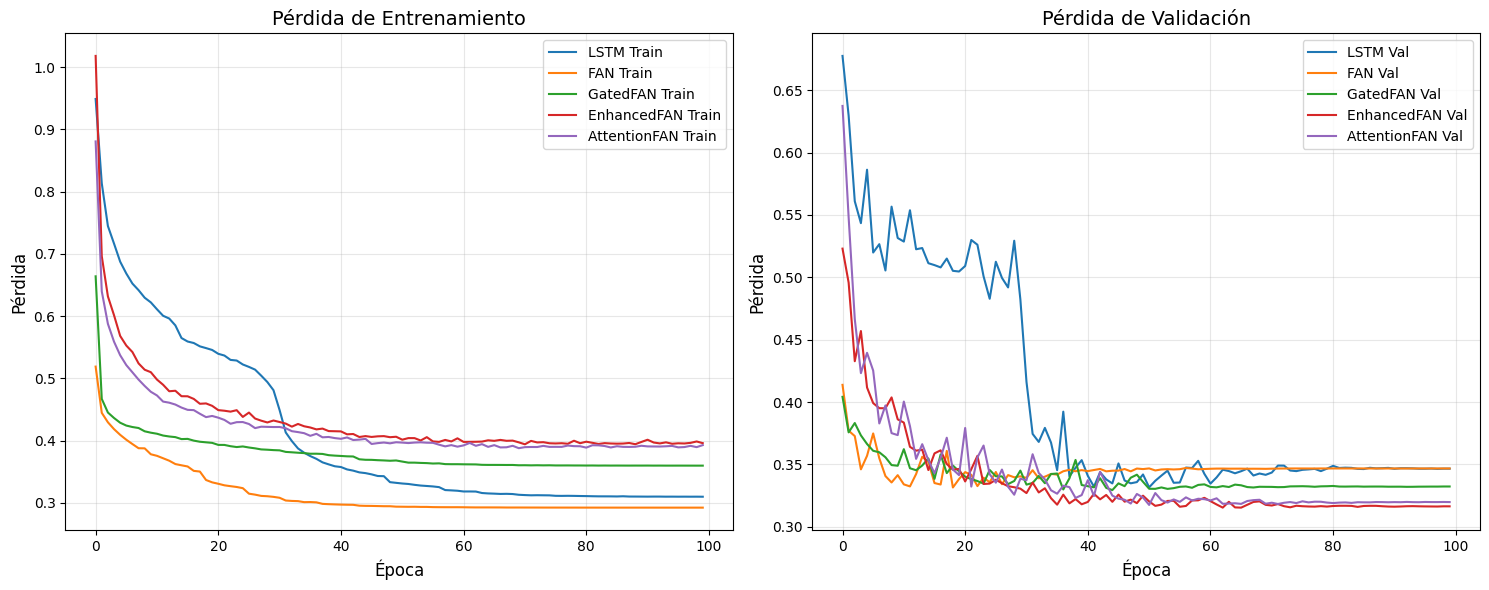


Preparando datos para modelo SARIMA mejorado...
Usando 5 variables exógenas clave para SARIMA: ['hour_sin', 'hour_cos', 'day_of_week_sin', 'day_of_week_cos', 'is_weekend']

Entrenando modelo SARIMA mejorado...

Entrenando modelo SARIMA mejorado...

Modelo SARIMA ajustado con parámetros complejos

Resumen del modelo SARIMA:
Orden: (2, 1, 1), Orden estacional: (1, 1, 1, 24)
AIC: 48231.723215318576, BIC: 48322.21445614559
Tiempo de entrenamiento: 457.60 segundos (7.63 minutos)

SARIMA - RMSE: 0.9585, R²: -0.7326
SARIMA - Pérdida de validación: 1.2404

Pérdidas finales de todos los modelos:
         Modelo  Pérdida de Entrenamiento  Pérdida de Validación
0          LSTM                  0.309915               0.346609
1           FAN                  0.292393               0.346771
2      GatedFAN                  0.359858               0.332318
3   EnhancedFAN                  0.395965               0.316411
4  AttentionFAN                  0.392813               0.319834
5        SARIMA

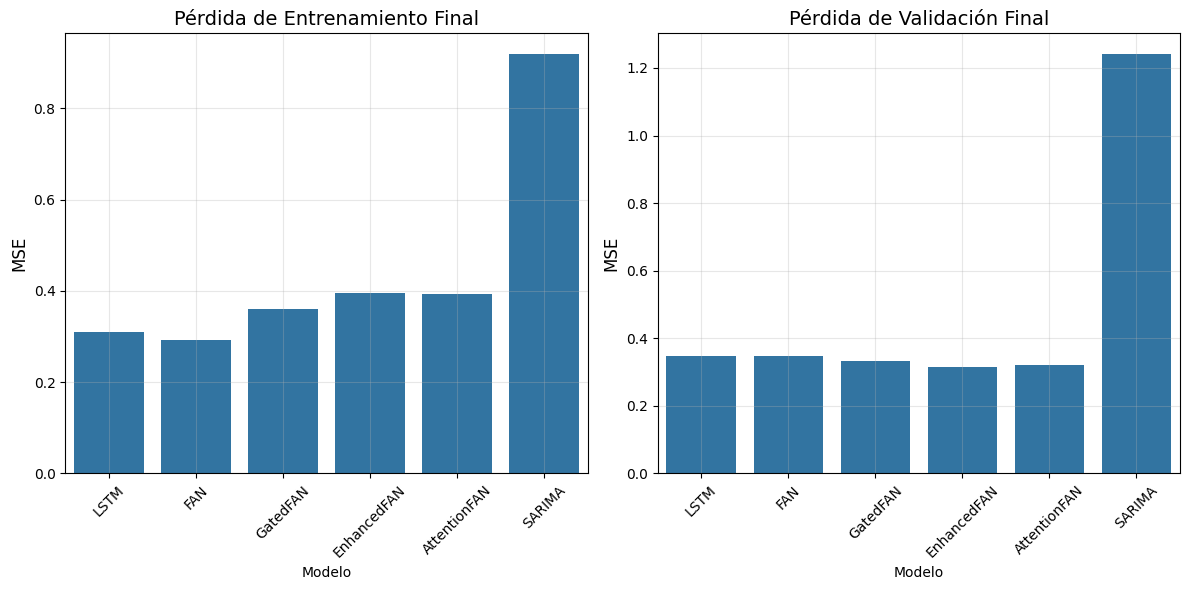


Gráfico interactivo - Predicción de Consumo Eléctrico (1 semana):
Figura guardada como 'images/predicciones_semana.png'

Gráfico interactivo: Predicción de Consumo Eléctrico (1 semana)


Output()


Gráfico interactivo - Detalle de la Predicción (3 días):
Figura guardada como 'images/predicciones_detalle.png'

Gráfico interactivo: Detalle de la Predicción (3 días)


Output()


Métricas de evaluación:
LSTM - RMSE: 0.5103, R²: 0.5089
FAN - RMSE: 0.4987, R²: 0.5309
GatedFAN - RMSE: 0.4942, R²: 0.5395
EnhancedFAN - RMSE: 0.4816, R²: 0.5625
AttentionFAN - RMSE: 0.4824, R²: 0.5612


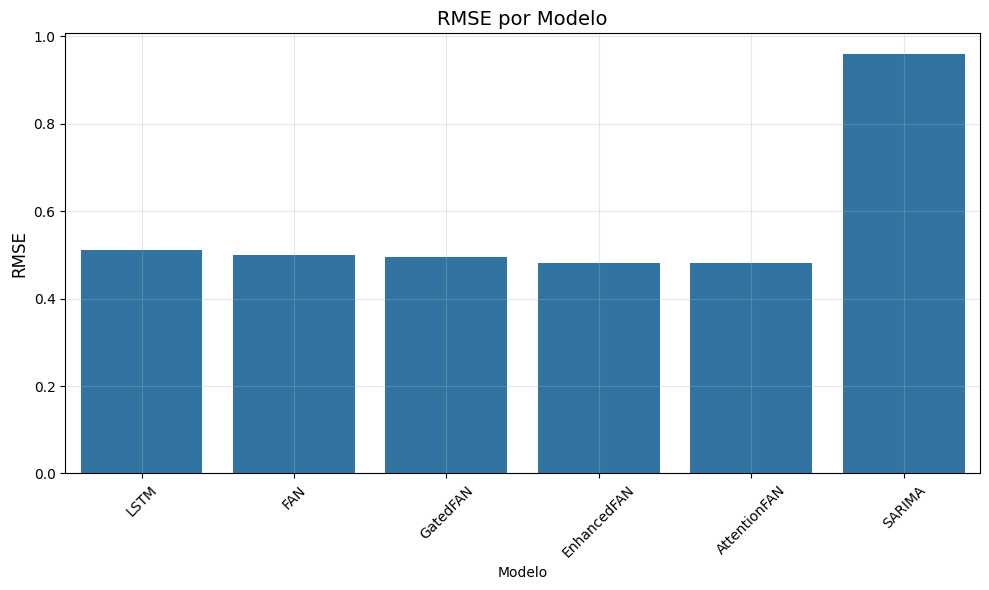


Comparación de modelos FAN:
         Modelo      RMSE        R²
0           FAN  0.498742  0.530929
1      GatedFAN  0.494158  0.539513
2   EnhancedFAN  0.481646  0.562536
3  AttentionFAN  0.482375  0.561211


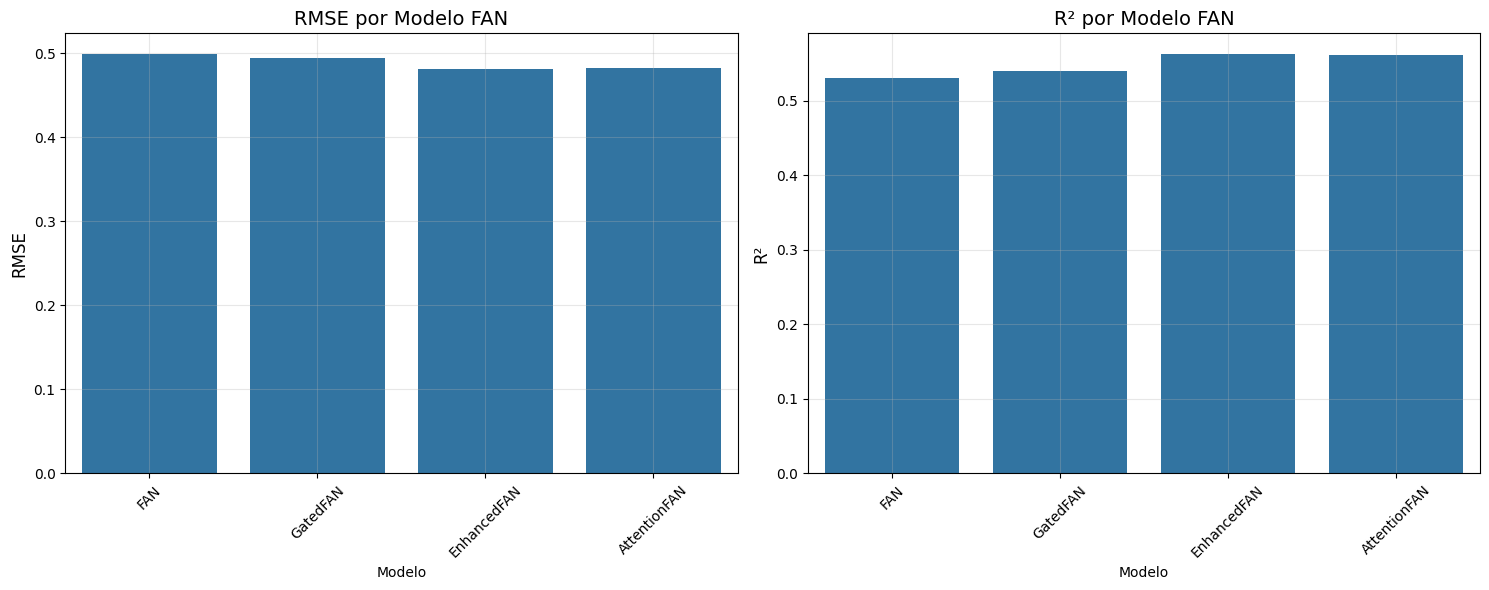


Realizando análisis detallado de resultados...

=== ANÁLISIS DETALLADO DE RESULTADOS ===

Métricas de evaluación:
                  RMSE        R²
Modelo                          
LSTM          0.510326  0.508887
FAN           0.498742  0.530929
GatedFAN      0.494158  0.539513
EnhancedFAN   0.481646  0.562536
AttentionFAN  0.482375  0.561211
SARIMA        0.958520 -0.732559


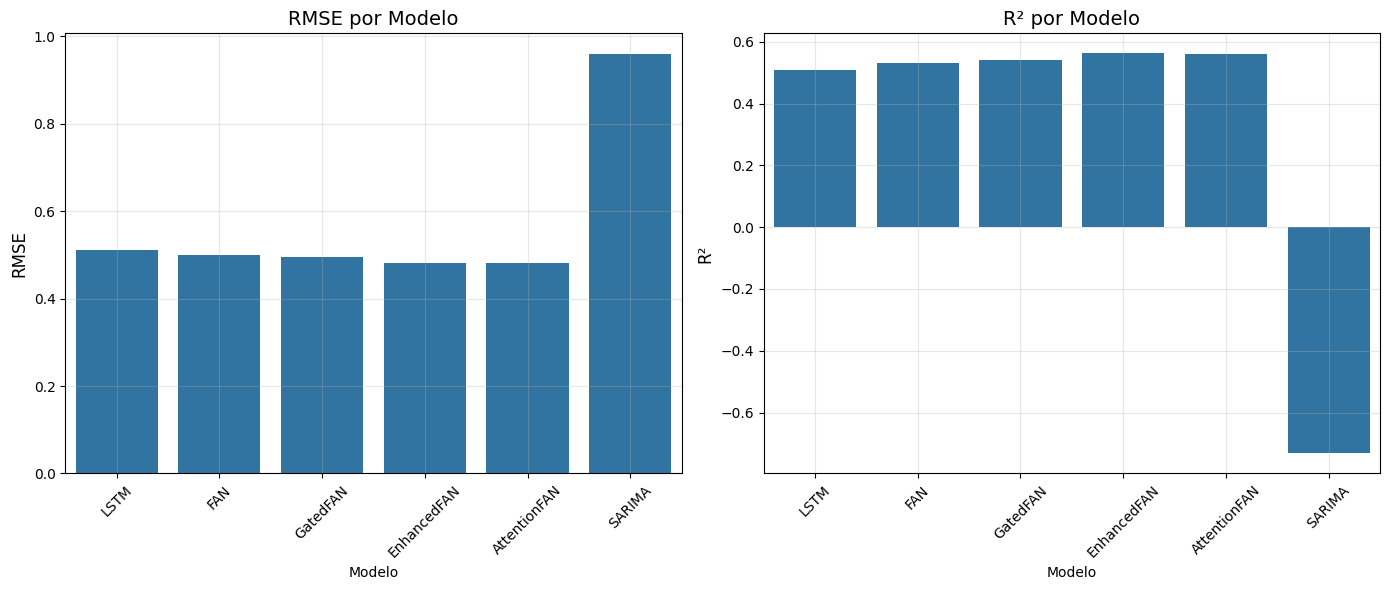

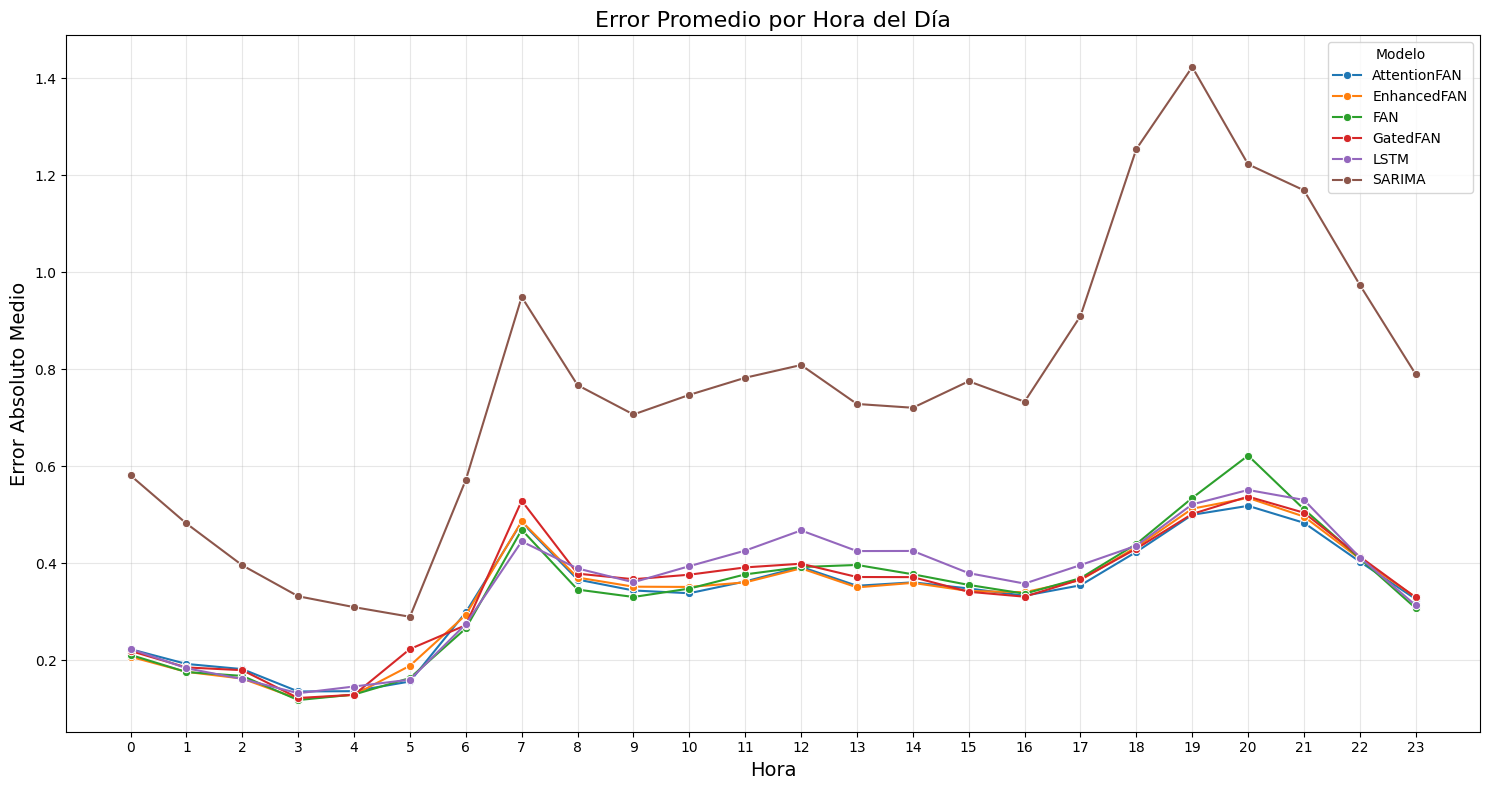


Análisis de predicciones en valores extremos:
              RMSE_Valores_Bajos  RMSE_Valores_Altos
Modelo                                              
LSTM                    0.298446            1.200996
FAN                     0.224813            1.166903
GatedFAN                0.239078            1.189463
EnhancedFAN             0.252791            1.123777
AttentionFAN            0.197427            1.146038
SARIMA                  1.257324            0.958573


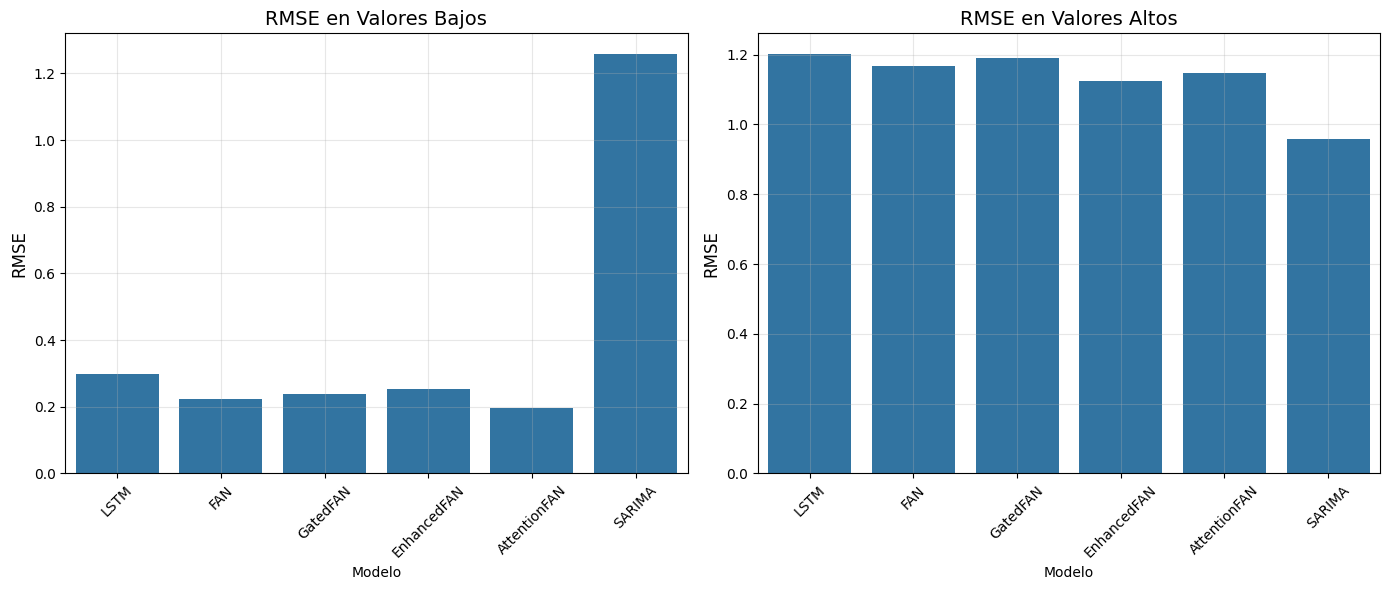


COMPARATIVA DE RENDIMIENTO DE MODELOS
         Modelo Tiempo (min)    RMSE       R² Eficiencia (RMSE/min)
3   EnhancedFAN        18.00  0.4816   0.5625                0.0268
4  AttentionFAN        21.32  0.4824   0.5612                0.0226
2      GatedFAN        24.53  0.4942   0.5395                0.0201
1           FAN        16.50  0.4987   0.5309                0.0302
0          LSTM        22.36  0.5103   0.5089                0.0228
5        SARIMA         7.63  0.9585  -0.7326                0.1257
Nota: Valores menores de RMSE/Eficiencia y mayores de R² son mejores


In [17]:
# Función principal
def main():
    print("Procesando los datos...")
    
    # Descargar el dataset
    print("Descargando el dataset de consumo eléctrico...")
    individual_household_electric_power_consumption = fetch_ucirepo(id=235)
    
    # Extraer los datos
    X = individual_household_electric_power_consumption.data.features
    y = individual_household_electric_power_consumption.data.targets
    
    # Procesar el dataset
    df = process_power_consumption_data(X, y)
    
    print(f"\nDatos procesados. Forma del dataframe: {df.shape}")
    
    # Target y características
    target_col = 'Global_active_power'
    feature_cols = df.columns.tolist()
    
    # Normalización
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
    
    # Crear secuencias
    print("\nCreando secuencias para entrenamiento...")
    seq_length = 24  # 24 horas (1 día)
    X_seq, y_seq = create_sequences(df_scaled, target_col, seq_length=seq_length, horizon=1)
    print(f"Forma de las secuencias - X: {X_seq.shape}, y: {y_seq.shape}")
    
    # Dividir en train, val, test
    test_size = 0.2
    val_size = 0.2
    
    # Primero separamos el test
    test_start_idx = int(len(X_seq) * (1 - test_size))
    X_train_val, X_test = X_seq[:test_start_idx], X_seq[test_start_idx:]
    y_train_val, y_test = y_seq[:test_start_idx], y_seq[test_start_idx:]
    
    # Luego separamos train y validación
    val_start_idx = int(len(X_train_val) * (1 - val_size))
    X_train, X_val = X_train_val[:val_start_idx], X_train_val[val_start_idx:]
    y_train, y_val = y_train_val[:val_start_idx], y_train_val[val_start_idx:]
    
    print(f"\nDivisión del dataset:")
    print(f"Train: {X_train.shape[0]} muestras")
    print(f"Validación: {X_val.shape[0]} muestras")
    print(f"Test: {X_test.shape[0]} muestras")
    
    # Convertir a tensores
    X_train_tensor = torch.FloatTensor(X_train)
    y_train_tensor = torch.FloatTensor(y_train)
    X_val_tensor = torch.FloatTensor(X_val)
    y_val_tensor = torch.FloatTensor(y_val)
    X_test_tensor = torch.FloatTensor(X_test)
    y_test_tensor = torch.FloatTensor(y_test)
    
    # Crear dataloaders
    batch_size = 32
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    
    # Usar el generator con la semilla fija para los DataLoaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, 
                              generator=generator, worker_init_fn=lambda x: random.seed(SEED))
    val_loader = DataLoader(val_dataset, batch_size=batch_size, 
                           generator=generator, worker_init_fn=lambda x: random.seed(SEED))
    test_loader = DataLoader(test_dataset, batch_size=batch_size, 
                            generator=generator, worker_init_fn=lambda x: random.seed(SEED))
    
    # Parámetros de los modelos
    input_size = X_seq.shape[2]  # Número de características
    hidden_size = 128  
    num_layers = 8 
    dropout_rate = 0.2
    
    # Inicializar modelos
    models = {
        'LSTM': LSTMModel(input_size, hidden_size, num_layers),
        'FAN': FAN(input_size, hidden_size, num_layers),
        'GatedFAN': GatedFAN(input_size, hidden_size, num_layers),
        'EnhancedFAN': EnhancedFAN(input_size, hidden_size, num_layers, dropout_rate=dropout_rate),
        'AttentionFAN': AttentionFAN(input_size, hidden_size, num_layers, dropout_rate=dropout_rate)
    }
    
    # Aplicar inicialización de pesos mejorada a todos los modelos
    for name, model in models.items():
        model.apply(init_weights)
        print(f"Inicialización de pesos mejorada aplicada al modelo {name}")
    
    criterion = nn.MSELoss()
    model_history = {}
    training_times = {}
    
    # Entrenar modelos con el entrenador mejorado
    num_epochs = 100
    for name, model in models.items():
        print(f"\nEntrenando modelo {name}...")
        
        # Ajustar hiperparámetros (learning rate más bajo y weight decay)
        optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)
        
        # Usar función de entrenamiento mejorada sin early stopping
        train_losses, val_losses, training_time = train_model_improved(
            model, train_loader, val_loader, optimizer, criterion, 
            num_epochs=num_epochs
        )
        
        model_history[name] = (train_losses, val_losses)
        training_times[name] = training_time
    
    # Visualizar curvas de pérdida con límite en el eje Y
    plt.figure(figsize=(15, 6))
    
    plt.subplot(1, 2, 1)
    for name, (train_losses, _) in model_history.items():
        plt.plot(train_losses, label=f'{name} Train')
    plt.title('Pérdida de Entrenamiento', fontsize=14)
    plt.xlabel('Época', fontsize=12)
    plt.ylabel('Pérdida', fontsize=12)
    #plt.ylim(0, 5)  # Limitar eje Y a máximo 10
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    for name, (_, val_losses) in model_history.items():
        plt.plot(val_losses, label=f'{name} Val')
    plt.title('Pérdida de Validación', fontsize=14)
    plt.xlabel('Época', fontsize=12)
    plt.ylabel('Pérdida', fontsize=12)
    #plt.ylim(0, 5)  # Limitar eje Y a máximo 10
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(os.path.join(images_dir, 'curvas_perdida.png'), dpi=300, bbox_inches='tight')
    plt.show()
    
    # Evaluar en conjunto de prueba
    test_predictions = {}
    
    for name, model in models.items():
        model.eval()
        all_preds = []
        all_actuals = []
        
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                X_batch = X_batch.to(DEVICE)  # Usar DEVICE global
                outputs = model(X_batch).cpu().numpy()  # Asegurarse de que .cpu() está presente
                all_preds.append(outputs)
                all_actuals.append(y_batch.numpy())
        
        # Concatenar todas las predicciones y valores reales
        predictions = np.vstack(all_preds).reshape(-1)
        actuals = np.vstack(all_actuals).reshape(-1)
        
        # Invertir la normalización
        col_idx = df.columns.get_loc(target_col)
        pred_array = np.zeros((len(predictions), len(feature_cols)))
        actual_array = np.zeros((len(actuals), len(feature_cols)))
        
        pred_array[:, col_idx] = predictions
        actual_array[:, col_idx] = actuals
        
        pred_denorm = scaler.inverse_transform(pred_array)[:, col_idx]
        actual_denorm = scaler.inverse_transform(actual_array)[:, col_idx]
        
        test_predictions[name] = (pred_denorm, actual_denorm)
    
    # Preparar datos para SARIMA mejorado
    print("\nPreparando datos para modelo SARIMA mejorado...")

    # Series temporales
    train_target = df[target_col].iloc[:-len(y_test)]
    test_target = df[target_col].iloc[-len(y_test):]

    # Seleccionar solo las variables exógenas más importantes (hora del día y día de la semana)
    # que tienen mayor influencia en el consumo eléctrico
    important_exog_cols = ['hour_sin', 'hour_cos', 'day_of_week_sin', 'day_of_week_cos', 'is_weekend']
    filtered_exog_cols = [col for col in important_exog_cols if col in df.columns]

    if filtered_exog_cols:
        exog_train = df[filtered_exog_cols].iloc[:-len(y_test)]
        exog_test = df[filtered_exog_cols].iloc[-len(y_test):]
        print(f"Usando {len(filtered_exog_cols)} variables exógenas clave para SARIMA: {filtered_exog_cols}")
    else:
        exog_train = None
        exog_test = None
        print("No se encontraron las variables exógenas clave. Usando SARIMA sin exógenas.")

    # Entrenar modelo SARIMA mejorado y hacer predicciones
    print("\nEntrenando modelo SARIMA mejorado...")
    sarima_forecast, sarima_fit, sarima_time = train_and_predict_sarima_improved(train_target, test_target, exog_train, exog_test)

    # Guardar el tiempo de entrenamiento de SARIMA
    training_times['SARIMA'] = sarima_time
    
    # Reemplazar las predicciones
    arima_forecast = sarima_forecast
    
    # Calcular métricas para SARIMA
    sarima_rmse = np.sqrt(mean_squared_error(test_target, sarima_forecast))
    sarima_r2 = r2_score(test_target, sarima_forecast)

    print(f"\nSARIMA - RMSE: {sarima_rmse:.4f}, R²: {sarima_r2:.4f}")
    
    # Calcular el error del SARIMA en el conjunto de validación
    val_target = df[target_col].iloc[-len(y_test)-len(y_val):-len(y_test)]
    if filtered_exog_cols:
        val_exog = df[filtered_exog_cols].iloc[-len(y_test)-len(y_val):-len(y_test)]
        sarima_val_pred = sarima_fit.predict(start=len(train_target), end=len(train_target)+len(val_target)-1, exog=val_exog)
    else:
        sarima_val_pred = sarima_fit.predict(start=len(train_target), end=len(train_target)+len(val_target)-1)

    sarima_val_loss = mean_squared_error(sarima_val_pred, val_target)
    print(f"SARIMA - Pérdida de validación: {sarima_val_loss:.4f}")

    # Recopilar pérdidas finales de entrenamiento y validación para todos los modelos
    final_losses = {
        'Modelo': [],
        'Pérdida de Entrenamiento': [],
        'Pérdida de Validación': []
    }

    # Añadir pérdidas de modelos de redes neuronales
    for name, (train_losses, val_losses) in model_history.items():
        final_losses['Modelo'].append(name)
        final_losses['Pérdida de Entrenamiento'].append(train_losses[-1])
        final_losses['Pérdida de Validación'].append(val_losses[-1])

    # Añadir pérdidas de SARIMA
    final_losses['Modelo'].append('SARIMA')
    final_losses['Pérdida de Entrenamiento'].append(sarima_rmse**2)  # Usando el error de test como aproximación
    final_losses['Pérdida de Validación'].append(sarima_val_loss)

    # Convertir a DataFrame y visualizar
    final_losses_df = pd.DataFrame(final_losses)
    print("\nPérdidas finales de todos los modelos:")
    print(final_losses_df)

    # Visualizar comparación de pérdidas finales
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.barplot(x='Modelo', y='Pérdida de Entrenamiento', data=final_losses_df)
    plt.title('Pérdida de Entrenamiento Final', fontsize=14)
    plt.ylabel('MSE', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    sns.barplot(x='Modelo', y='Pérdida de Validación', data=final_losses_df)
    plt.title('Pérdida de Validación Final', fontsize=14)
    plt.ylabel('MSE', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(os.path.join(images_dir, 'comparacion_perdidas_finales.png'), dpi=300, bbox_inches='tight')
    plt.show()
    
    # Fechas para el conjunto de test
    test_dates = df.index[-len(y_test):]
    
    # Crear gráficos interactivos para predicciones de 1 semana
    print("\nGráfico interactivo - Predicción de Consumo Eléctrico (1 semana):")
    plot_interactive_predictions(test_dates, test_target, test_predictions, sarima_forecast, period="week", widget_id="week")
    
    # Crear gráficos interactivos para predicciones detalladas de 3 días
    print("\nGráfico interactivo - Detalle de la Predicción (3 días):")
    plot_interactive_predictions(test_dates, test_target, test_predictions, sarima_forecast, period="detail", widget_id="detail")
    
    # Métricas de evaluación (solo RMSE y R²)
    print("\nMétricas de evaluación:")
    eval_metrics = []
    for name, (preds, actuals) in test_predictions.items():
        rmse = np.sqrt(mean_squared_error(actuals, preds))
        r2 = r2_score(actuals, preds)
        eval_metrics.append({'Modelo': name, 'RMSE': rmse, 'R²': r2})
        print(f"{name} - RMSE: {rmse:.4f}, R²: {r2:.4f}")
    
    # Agregar SARIMA a las métricas
    eval_metrics.append({'Modelo': 'SARIMA', 'RMSE': sarima_rmse, 'R²': sarima_r2})
    
    # Convertir a DataFrame para visualización
    eval_df = pd.DataFrame(eval_metrics)
    
    # Visualizar RMSE de todos los modelos
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Modelo', y='RMSE', data=eval_df)
    plt.title('RMSE por Modelo', fontsize=14)
    plt.ylabel('RMSE', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(os.path.join(images_dir, 'rmse_comparativo.png'), dpi=300, bbox_inches='tight')
    plt.show()
    
    # Comparar rendimiento de los diferentes modelos FAN (solo RMSE)
    fan_models = ['FAN', 'GatedFAN', 'EnhancedFAN', 'AttentionFAN']
    fan_metrics = {
        'Modelo': [],
        'RMSE': [],
        'R²': []
    }

    # Recopilar métricas solo para modelos FAN
    for name in fan_models:
        if name in test_predictions:
            preds, actuals = test_predictions[name]
            rmse = np.sqrt(mean_squared_error(actuals, preds))
            r2 = r2_score(actuals, preds)
            
            fan_metrics['Modelo'].append(name)
            fan_metrics['RMSE'].append(rmse)
            fan_metrics['R²'].append(r2)

    # Crear DataFrame y visualizar
    fan_metrics_df = pd.DataFrame(fan_metrics)
    print("\nComparación de modelos FAN:")
    print(fan_metrics_df)

    # Visualizar comparación de modelos FAN
    plt.figure(figsize=(15, 6))

    # RMSE
    plt.subplot(1, 2, 1)
    sns.barplot(x='Modelo', y='RMSE', data=fan_metrics_df)
    plt.title('RMSE por Modelo FAN', fontsize=14)
    plt.ylabel('RMSE', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    # R²
    plt.subplot(1, 2, 2)
    sns.barplot(x='Modelo', y='R²', data=fan_metrics_df)
    plt.title('R² por Modelo FAN', fontsize=14)
    plt.ylabel('R²', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(os.path.join(images_dir, 'comparacion_modelos_fan.png'), dpi=300, bbox_inches='tight')
    plt.show()
    
    # Realizar análisis detallado de resultados
    print("\nRealizando análisis detallado de resultados...")
    
    # Obtener fechas del test
    test_dates = df.index[-len(y_test):]
    
    # Llamar a la función de análisis
    metrics_df, error_df, extremes_df = analyze_results(
        models=models,
        test_predictions=test_predictions,
        test_dates=test_dates,
        test_target=test_target,
        arima_forecast=arima_forecast
    )
    
    # Guardar resultados en CSV para análisis posterior
    metrics_df.to_csv(os.path.join(images_dir, 'metricas_modelos.csv'))
    error_df.to_csv(os.path.join(images_dir, 'errores_por_hora.csv'))
    extremes_df.to_csv(os.path.join(images_dir, 'analisis_valores_extremos.csv'))
    
    # Preparar datos para la tabla de comparación de rendimiento
    model_names = list(test_predictions.keys()) + ['SARIMA']
    training_time_values = [training_times[name] for name in model_names]
    rmse_values = []
    r2_values = []
    
    # Recopilar métricas
    for name in model_names:
        if name == 'SARIMA':
            rmse_values.append(sarima_rmse)
            r2_values.append(sarima_r2)
        else:
            preds, actuals = test_predictions[name]
            rmse = np.sqrt(mean_squared_error(actuals, preds))
            r2 = r2_score(actuals, preds)
            rmse_values.append(rmse)
            r2_values.append(r2)
    
    # Mostrar tabla comparativa de tiempo vs rendimiento
    performance_df = show_performance_comparison_table(model_names, training_time_values, rmse_values, r2_values)
    performance_df.to_csv(os.path.join(images_dir, 'comparativa_rendimiento.csv'))


if __name__ == "__main__":
    main()



____

____

<h1 align="center">CONCLUSIONES</h1>

El objetivo de este estudio es el de examinar la posibilidad de aplicar las [nuevas redes experimentales FAN](https://arxiv.org/html/2410.02675v3) a un proyecto real con datos reales, basados en funciones desconocidas del mundo físico real, con ciclos no tan estables, más allá de su testeo con funciones matemáticas conocidas y estables descritas en el en el [artículo del Dr. Ashish Bamania](https://levelup.gitconnected.com/fourier-analysis-networks-fans-are-here-to-break-barriers-in-ai-1c521c6656bc).

Hemos visto que implementar redes FAN es algo bastante alcanzable, desde una sencilla hasta redes más profundas, incluso variantes con puertas o transformers. Aunque no hay librerías específicas creadas, se pueden usar las funciones de PyTorch para crearlas a mano.  

#### RESULTADOS
  
- El resultado es muy prometedor para las redes FAN.
- Todos los modelos FAN y el LSTM han funcionado muy bien y de manera muy similar, con un poco de ajuste simple de hiperparámetros, casi "recién sacados de la caja". **Esto confirma la gran utilidad de las redes FAN,** y que son una realidad aplicable de manera inmediata más allá de papers teóricos.
- El SARIMA sin embargo es el que peor se comporta, habiendo otenido que probar con muchas configuraciones diferentes para poder dar con la que está actualmente implementada. De hecho, sus errores son mucho más notables que el del resto de las redes.
- Entre LSTM y FAN, que son los mejores, las FAN han sido mejores en resultados. Además, si observamos la tabla anterior de "Comparativa de rendimiento de modelos", observamos que los FAN han sido mejores en métrica de error y en el coeficiente de determinación R², pero es que además 2 de ellos, incluyendo al mejor de todos (EnhancedFAN), han sido más de un 10% más rápidos que un LSTM tradicional. Además de manera importante, los FAN con un poco de configuración extra se adaptan mucho mejor a los picos de las funciones, ya que las sienten más fácilmente.  
##### Para los que no ejecuten el notebook, les hago spoiler de los resultados:  
#### Captura de la gráfica de loss en Entrenamiento y Test:  

![Gráfica de Loss](images/curvas_perdida.png)

    
#### Captura de las gráficas de las predicciones de los modelos sobre los datos reales:  

![Gráfica de 3 días](images/predicciones_detalle.png)  
  
![Gráfica de 1 semana](images/predicciones_semana.png)
  

#### NOTAS DEL AUTOR  
  
- El código en este notebook es bastante largo debido a la implementación de 6 modelos distintos, pero aplicarlos a uno o dos modelos será algo mucho más corto. Si decidís ejecutarlo llevará un buen tiempo, pero merecerá la pena.  
- Las capturas de las gráficas de errores y predicción que véis aquí puestas son gráficas dinámicas en ejecución, permitiéndoos visualizar los modelos que queráis en cada momento para facilitar la visualización; sin embargo, no aparecerán hasta que ejecutéis el notebook completo, ya que residen en memoria.

#### LICENCIA
Sois libres de reutilizar y redistribuir este código como queráis, necesitando sólo pequeños ajustes en realidad, pero siempre que citéis al autor de esta manera:  
  
Basado en el trabajo de David Jiménez Vicente:  
github.com/david-jimenez-vicente/experimental_FAN  
linkedin.com/in/jimenezdavid  

_____


¡Gracias por llegar conmigo al final de este comienzo!